# ResNet with Transfomers

- Minor Applied AI HvA
- Docenten: Michiel Bontenbal and Maarten Post
- Wednesday 24 October 2024

### Contents
0. Installs and imports
1. Get images and model
2. Run inference

----
Acknowledgements: Stijn Oomes

## 0. Installs and imports

In [11]:
#!pip install transformers --upgrade

In [10]:
#check version
import transformers
transformers.__version__

'4.45.1'

In [ ]:
#imports
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset
from PIL import Image

## 1. Load dataset and model

In [19]:
#Load the dataset
dataset = load_dataset("MichielBontenbal/elephants")
dataset

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 10
    })
})

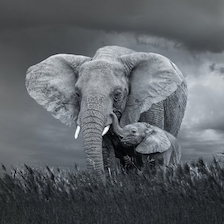

In [32]:
#Display the first image
dataset["train"]["image"][0]

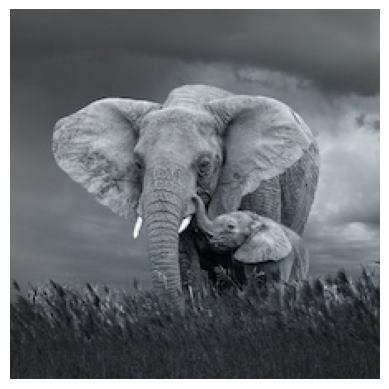

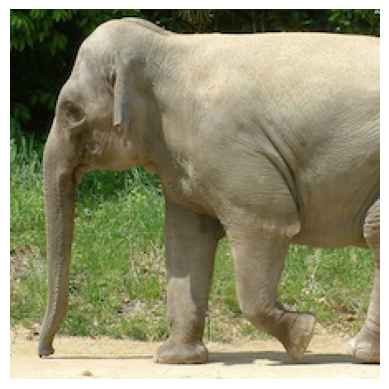

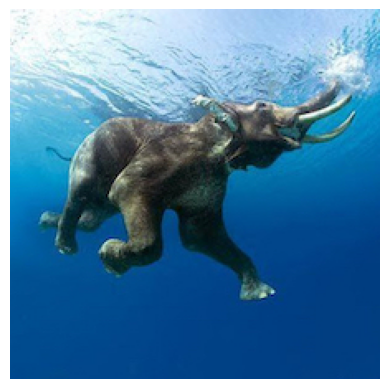

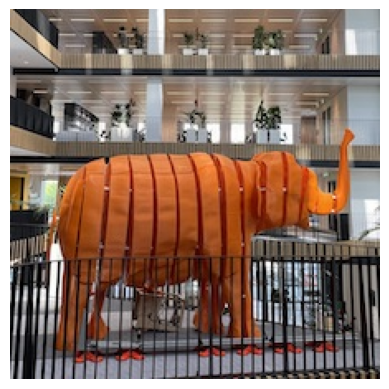

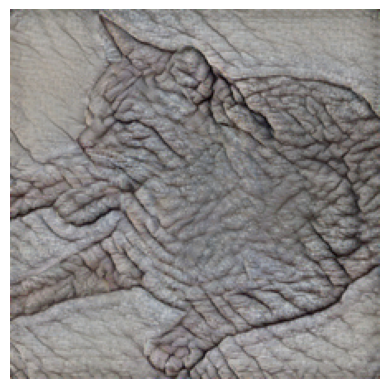

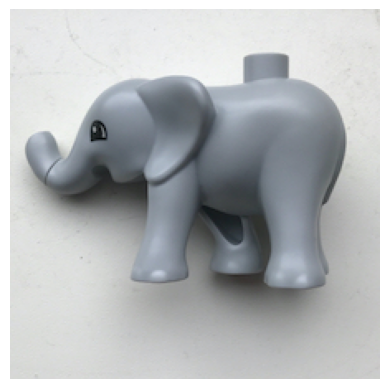

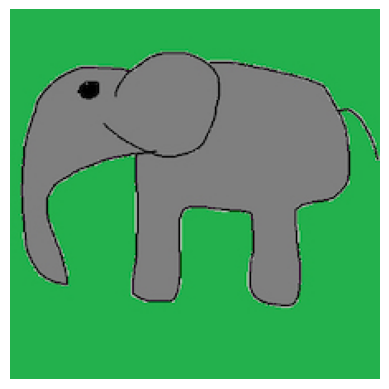

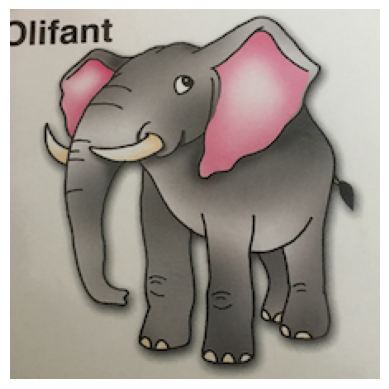

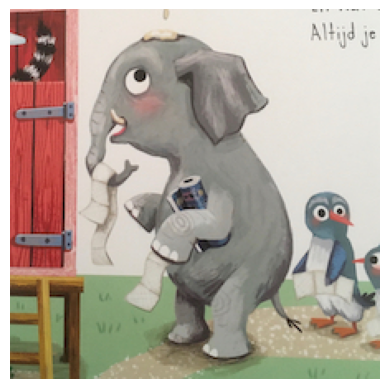

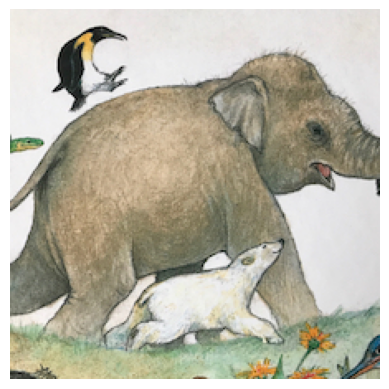

In [31]:
import matplotlib.pyplot as plt

for i in range(len(dataset["train"])):
    image = (dataset["train"]["image"][i])
    #image.show()
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

In [3]:
#download the model
image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

## 2. Run inference

In [51]:
#get the output of the model
image = dataset["train"]["image"][6]
inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

In [52]:
#get the prediction

logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()
predicted_class_label = model.config.id2label[predicted_class_idx]

In [53]:
#Get the confidence score
probabilities = torch.nn.functional.softmax(logits, dim=-1)
confidence = probabilities[0][predicted_class_idx].item()

print(f"Predicted class: {predicted_class_label}")
print(f"Confidence: {confidence:.2f}")

Predicted class: hatchet
Confidence: 0.09
